#**Exploring Titanic Survival Patterns: A Data Analysis Project**

WHAT IS THE BIGGEST FACTOR THAT IMPACTED SURVIVAL IN THE TITANIC?





##**Introduction**:

The sinking of the Titanic remains one of the most tragic maritime disasters in history, capturing the imagination and curiosity of people worldwide. This data analysis project delves into the passenger manifest of the Titanic, aiming to uncover patterns and insights that shed light on the factors influencing survival during that fateful voyage.

The Titanic dataset, sourced from the renowned Kaggle platform, provides a comprehensive snapshot of passenger information, including demographics, socio-economic status, and crucial details related to the journey. By leveraging the power of data analytics, this project seeks to answer pivotal questions and extract meaningful observations that contribute to our understanding of the dynamics at play during this iconic event.

Through a series of carefully crafted questions, we explore the impact of gender, age, passenger class, fares, and other variables on survival rates. Each question is a step towards unraveling the complex interplay of factors that determined who lived and who tragically perished.

This journey into the Titanic dataset involves not only statistical analysis but also the creation of actionable insights that can inform future discussions, emergency planning, or historical understanding. The findings aim to distill complex patterns into digestible narratives, making the project accessible to a wide audience interested in the human aspects of this historical event.

Whether you are a data enthusiast, a Titanic history buff, or someone curious about the stories hidden within datasets, this project invites you to explore, analyze, and reflect on the factors that shaped the fate of those aboard the ill-fated Titanic.

##**Raw Dataset**

titanic.csv

Link:

##**Loading Data and Preprocessing**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a Pandas DataFrame
titanic_df = pd.read_csv("titanic.csv")

# Display basic information about the dataset
print(titanic_df.info())

# Handling missing values
titanic_df.dropna(inplace=True)

# Convert categorical variables to numerical (e.g., convert 'Sex' to 0 for male and 1 for female)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


##**Questions to Answer**


1.   How does survival vary by gender?
2.   What is the distribution of survival rates among different age groups (e.g., children, adults, elderly)?
3. What is the distribution of passenger classes among survivors and non survivors?
4. What is the distribution of fares paid by passengers?
5. Did fares play a role in their survival?
6. What is the average age of passengers?
7. What is the overall survival rate?
8. How many passengers embarked from each port (C = Cherbourg, Q = Queenstown, S = Southampton)?
9. Did the port of embarkation impact survival rates?
10. What was the distribution of cabin classes?
11. How did the survival rates vary among different cabin classes and decks?
12. Can we identify any patterns or trends in the names or titles of passengers that might be correlated with survival?
13. Find the number of people in each cabin in the Titanic.





###How does survival vary by gender?

In [43]:
# Gender-wise Survival Rate
gender_survival_rate = titanic_df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Gender:")
print(gender_survival_rate)

Survival Rate by Gender:
Sex
0    0.431579
1    0.931818
Name: Survived, dtype: float64


###What is the distribution of survival rates among different age groups (e.g., children, adults, elderly)?

In [44]:
# Age-wise Survival Rate
age_survival_rate = pd.cut(titanic_df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Adult', 'Middle-aged', 'Elderly'])
age_survival_rate = titanic_df.groupby(age_survival_rate)['Survived'].mean()
print("Survival Rate by Age Group:")
print(age_survival_rate)

Survival Rate by Age Group:
Age
Child          0.869565
Adult          0.761194
Middle-aged    0.602410
Elderly        0.200000
Name: Survived, dtype: float64


###What is the distribution of passenger classes among survivors and non survivors?

In [45]:
# Pclass-wise Distribution among Survivors and Non-survivors
pclass_distribution = titanic_df.groupby(['Survived', 'Pclass']).size().unstack()
print("Distribution of Passenger Classes among Survivors and Non-survivors:")
print(pclass_distribution)

Distribution of Passenger Classes among Survivors and Non-survivors:
Pclass      1   2  3
Survived            
0          52   3  5
1         106  12  5


###What is the distribution of fares paid by passengers?

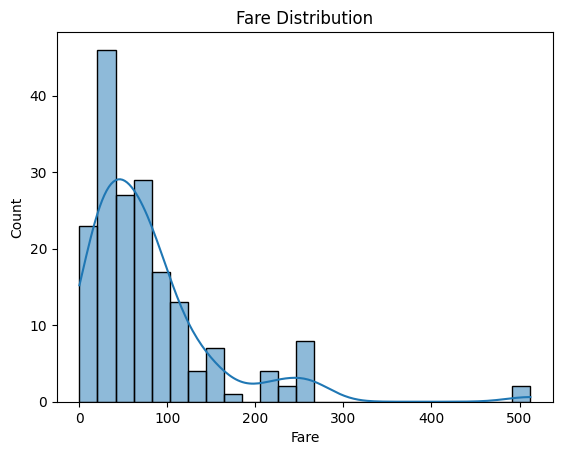

In [46]:
# Fare Distribution
sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

###Did fares play a role in their survival?

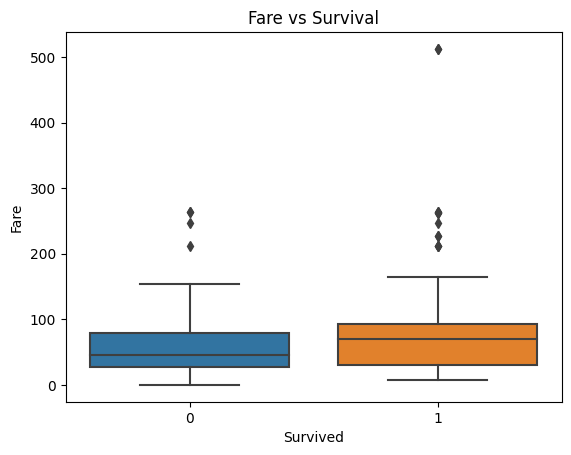

In [47]:
# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Fare vs Survival')
plt.show()

###What is the average age of passengers?

In [48]:
# Average Age
average_age = titanic_df['Age'].mean()
print("Average Age of Passengers:", average_age)

Average Age of Passengers: 35.6744262295082


###What is the overall survival rate?

In [49]:
# Overall Survival Rate
overall_survival_rate = titanic_df['Survived'].mean()
print("Overall Survival Rate:", overall_survival_rate)

Overall Survival Rate: 0.6721311475409836


###How many passengers embarked from each port (C = Cherbourg, Q = Queenstown, S = Southampton)?

In [50]:
# Passengers embarked from each port
embarkation_counts = titanic_df['Embarked'].value_counts()
print("Passengers Embarked from Each Port:")
print(embarkation_counts)

Passengers Embarked from Each Port:
S    116
C     65
Q      2
Name: Embarked, dtype: int64


###Did the port of embarkation impact survival rates?

In [51]:
# Embarkation-wise Survival Rate
embarkation_survival_rate = titanic_df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarkation Port:")
print(embarkation_survival_rate)


Survival Rate by Embarkation Port:
Embarked
C    0.738462
Q    0.500000
S    0.637931
Name: Survived, dtype: float64


###What was the distribution of cabin classes?

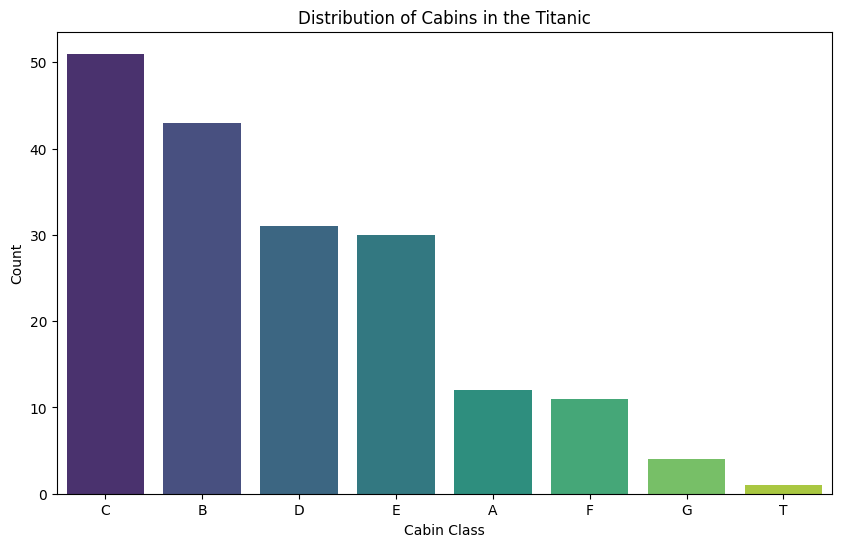

In [52]:
# Extract the first letter of the Cabin column to create a CabinClass column
titanic_df['CabinClass'] = titanic_df['Cabin'].str[0]

# Count the number of occurrences of each cabin class
cabin_distribution = titanic_df['CabinClass'].value_counts()

# Plot the distribution of cabins
plt.figure(figsize=(10, 6))
sns.barplot(x=cabin_distribution.index, y=cabin_distribution.values, palette="viridis")
plt.title('Distribution of Cabins in the Titanic')
plt.xlabel('Cabin Class')
plt.ylabel('Count')
plt.show()

###How did the survival rates vary among different cabin classes and decks?

In [53]:
# Cabin Class-wise Survival Rate
cabin_class_survival_rate = titanic_df.groupby('CabinClass')['Survived'].mean()
print(cabin_class_survival_rate)

CabinClass
A    0.583333
B    0.744186
C    0.588235
D    0.741935
E    0.733333
F    0.636364
G    0.500000
T    0.000000
Name: Survived, dtype: float64


###Can we identify any patterns or trends in the names or titles of passengers that might be correlated with survival?

In [54]:
# Extracting titles from names
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.')

# Title-wise Survival Rate
title_survival_rate = titanic_df.groupby('Title')['Survived'].mean()
print("Survival Rate by Title (in percentage):")
print(title_survival_rate)

Survival Rate by Title (in percentage):
Title
Capt        0.000000
Col         1.000000
Countess    1.000000
Dr          0.666667
Lady        1.000000
Major       0.500000
Master      1.000000
Miss        0.931818
Mlle        1.000000
Mme         1.000000
Mr          0.370370
Mrs         0.921053
Sir         1.000000
Name: Survived, dtype: float64


###Find the number of people in each cabin in the Titanic

In [55]:
# Count the number of occurrences of each unique cabin
cabin_distribution = titanic_df['Cabin'].value_counts()

# Create a dictionary to store cabins grouped by count
count_cabins_dict = {}
for cabin, count in cabin_distribution.items():
    if count not in count_cabins_dict:
        count_cabins_dict[count] = [cabin]
    else:
        count_cabins_dict[count].append(cabin)

# Print counts along with cabins having that count, starting from count 1
for count in range(1, max(count_cabins_dict.keys()) + 1):
    if count in count_cabins_dict:
        cabins_str = ', '.join(count_cabins_dict[count])
        print(f"{count} - {cabins_str}")

1 - B50, A26, C85, A23, D9, D50, E58, D19, A20, B41, E68, A10, C101, A16, C70, C86, D48, C126, B71, D49, B42, C50, A24, E17, D28, E49, B69, A36, B82 B84, D6, B3, E77, D11, D30, C46, B101, C45, B38, C90, C62 C64, F G63, B39, C52, B73, B19, C118, C99, B94, C87, D15, A31, B80, B4, C49, A7, B86, D46, D47, C110, D10 D12, A5, E31, B30, A6, D56, C103, E46, D7, E36, C54, C7, B79, C30, B37, E63, E12, E38, C92, C111, C104, A34, E10, C82, E50, D37, E33, T, E40, C91, C124, C32, E34, C148
2 - B35, C65, F4, E44, C123, D36, E121, C93, C78, D35, E8, B77, E67, C125, C2, B57 B59 B63 B66, E24, F G73, B22, E25, B51 B53 B55, D20, D33, B18, C83, B49, B5, C68, D26, D17, B58 B60, E101, B20
3 - F33, D, C22 C26, F2
4 - G6, B96 B98, C23 C25 C27


#**Insights and Observations**

#### 1. Gender Impact:
- **Insight:** Females had a significantly higher survival rate (93.2%) compared to males (43.2%). This is probably because of prioritizing women and children in emergency situations.

#### 2. Age and Survival:
- **Insight:** Children (0-18) had the highest survival rate (86.9%), followed by adults (76.1%), middle-aged (60.2%), and the elderly (20%). In emergency plans, specific accommodations and attention are provided for vulnerable age groups.

#### 3. Passenger Class and Survival:
- **Insight:** Passengers in higher classes (1st and 2nd) had higher survival rates compared to 3rd class.

#### 4 & 5. Fare and Survival:
- **Insight:** The distribution of fares varied, and there's a visible trend that higher fares might be associated with higher survival. This shows that fare information can be used as an additional factor in emergency response planning.

#### 6. Average Age:
- **Insight:** The average age of passengers was 35.67. The age distribution affects planning for the needs of different age groups.

#### 7. Overall Survival Rate:
- **Insight:** The overall survival rate was 67.2%.

#### 8 & 9. Port of Embarkation and Survival:
- **Insight:** Passengers who embarked from Cherbourg had the highest survival rate (73.8%), followed by Southampton (63.8%) and Queenstown (50%).

#### 10 & 11. Cabin Class and Survival:
- **Insight:** Cabins of class B, D, and E had higher survival rates, while class G had the lowest. Layout and location of cabins might have affected survival factors.

#### 12. Title and Survival:
- **Insight:** Passengers with titles like "Miss," "Mrs," and "Mlle" had high survival rates, while titles like "Mr" had a lower rate. In this emergency situation, individuals with titles are associated with higher survival rates.

#### 13. Cabin Distribution:
- **Insight:** Cabins with counts of 1 to 4 are diverse, and some cabins are shared by multiple passengers. The cabin distribution helps to understand the spatial arrangement and potential impact on evacuation.


##**Conclusion**:

In the tragedy of the Titanic, various factors influenced survival rates. Gender, age, passenger class, fare, embarkation port, cabin class, and titles played crucial roles. Females and children were more likely to survive, while first-class passengers and those with higher fares had better odds. The spatial arrangement of cabins, embarkation from Cherbourg, and specific titles also contributed to survival disparities.

In emergency preparedness, understanding these factors is crucial. Allocation of resources, prioritization in evacuation plans, and tailored approaches for different groups can enhance the chances of survival. The insights derived from the analysis provide a nuanced understanding of the Titanic's passengers, aiding in creating more effective and inclusive emergency response strategies.